<table align="left">
  <td>
    <a target="_blank" href="https://www.kaggle.com/mateuszszczepanek/decisiontreeclassifier-iris-flower"><img src="https://cdn.iconscout.com/icon/free/png-128/kaggle-3628869-3030009.png" />Open in Kaggle</a>
  </td>
</table>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
species = {
    "Iris-setosa" : 0,
    "Iris-versicolor" : 1,
    "Iris-virginica" : 2,
}

In [4]:
df["class_value"] = df["species"].map(species)

In [5]:
df.sample(n=11)

,sepal_length,sepal_width,petal_length,petal_width,species,class_value
26,5.0,3.4,1.6,0.4,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
103,6.3,2.9,5.6,1.8,Iris-virginica,2
101,5.8,2.7,5.1,1.9,Iris-virginica,2
109,7.2,3.6,6.1,2.5,Iris-virginica,2
40,5.0,3.5,1.3,0.3,Iris-setosa,0
61,5.9,3.0,4.2,1.5,Iris-versicolor,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0
87,6.3,2.3,4.4,1.3,Iris-versicolor,1
86,6.7,3.1,4.7,1.5,Iris-versicolor,1


Draw a scatter plot for **'sepallength'** and __'sepalwidth'__

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

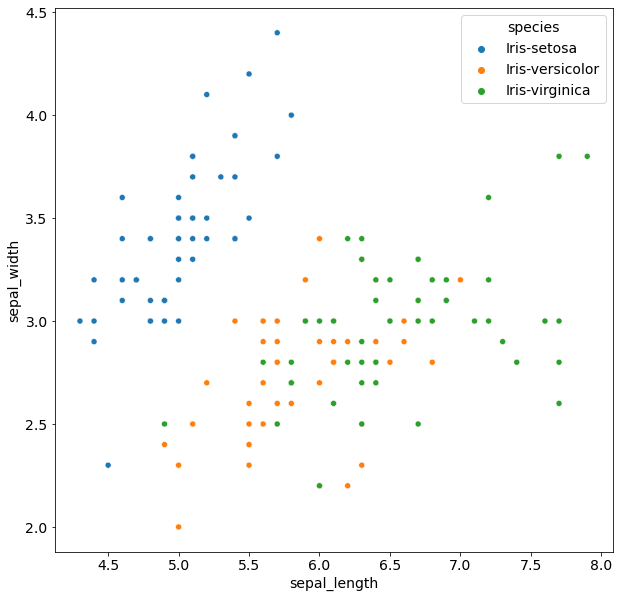

In [6]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 14})
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")

Draw a scatter plot for  __*'petallength'*__ and ___'petalwidth'___

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

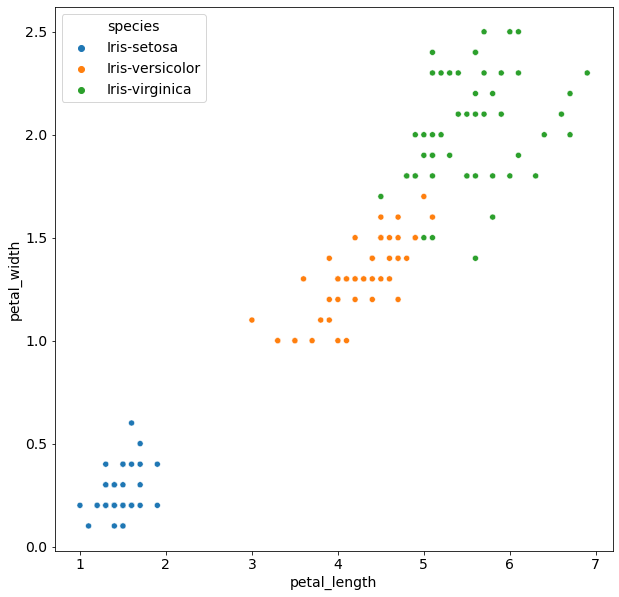

In [7]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 14})
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")

### Check which feature has the greatest impact for classifed

<AxesSubplot:>

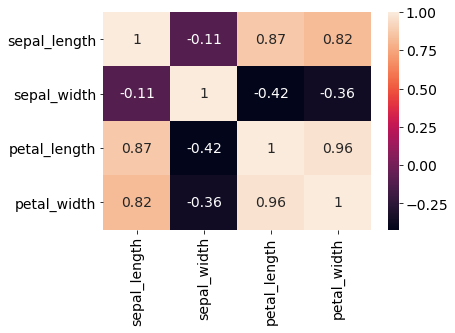

In [8]:
sns.heatmap( df.iloc[ : , :4].corr(), annot=True)

In [9]:
# Division of a data set into a dependent variable and an independent variable.

# independent variable
X = df[ ["petal_length", "petal_width"] ]

# dependent variable
y = df.class_value

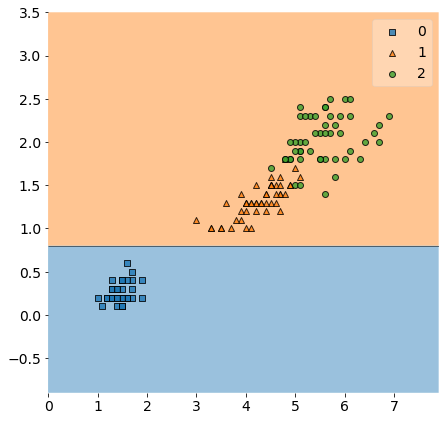

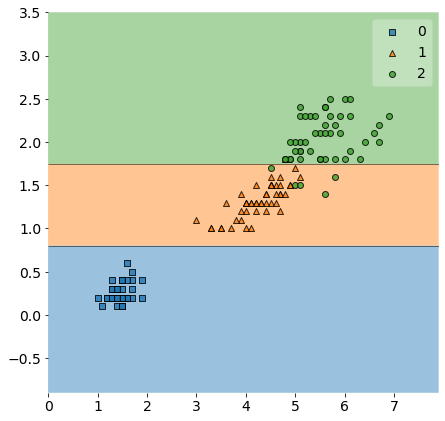

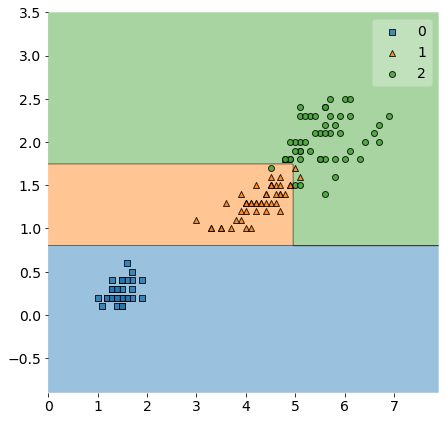

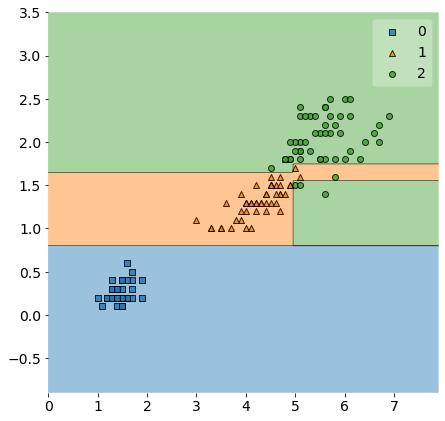

In [10]:
for x in range(1, 5):    
    model = DecisionTreeClassifier(max_depth=x, random_state=0)
    model.fit(X, y)
    plt.figure(figsize=(7, 7))
    plot_decision_regions(X.values, y.values, model)

In [11]:
model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=0)

### The importance of features

The most important feature in classifying iris flowers is petalwidth

In [12]:
pd.DataFrame(model.feature_importances_, X.columns).sort_values(by=0, ascending=False)

,0
petal_width,0.935078
petal_length,0.064922
